# Homework 11 - Assignment 2

# Derive K-means and animation exercise

### Compiled by Jonathan Kastelan aka #JKtours

#### Reference notebook from fbb

# Import packages

In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl

from IPython.display import display, clear_output
import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

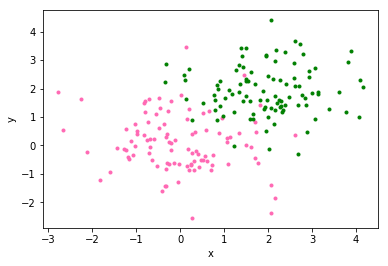

In [6]:
pl.plot(random_1[0], random_1[1], '.', c = 'HotPink')
pl.plot(random_2[0], random_2[1], '.', c = 'green')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [7]:
k = 2
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [8]:
# fix the centers to a poor initial guess
initcenters = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

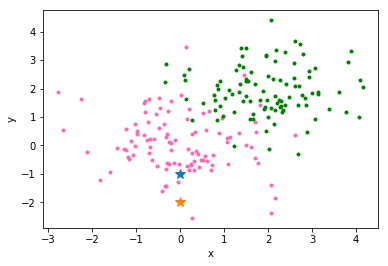

In [9]:
pl.plot(random_1[0], random_1[1], '.', c = 'HotPink')
pl.plot(random_2[0], random_2[1], '.', c = 'green')
pl.plot(initcenters[0,0], initcenters[0,1], '*', ms=10)
pl.plot(initcenters[1,0], initcenters[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [10]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [11]:
cl1 = distmetric(random_1[0], random_1[1], initcenters[0]) < distmetric(random_1[0], random_1[1], initcenters[1])
cl2 = distmetric(random_2[0], random_2[1], initcenters[0]) < distmetric(random_2[0], random_2[1], initcenters[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [12]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", initcenters, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

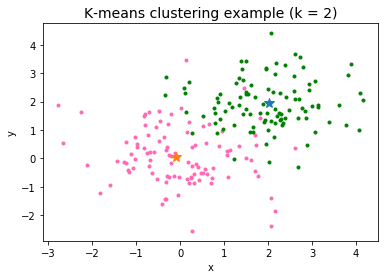

old center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 



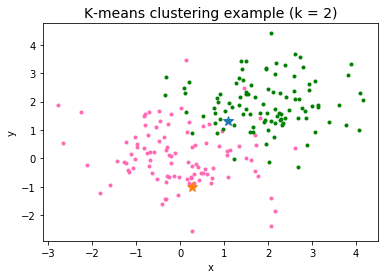

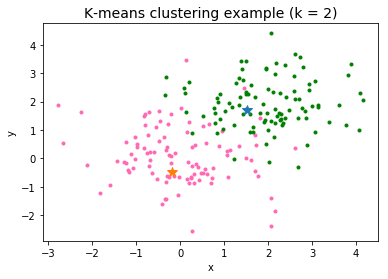

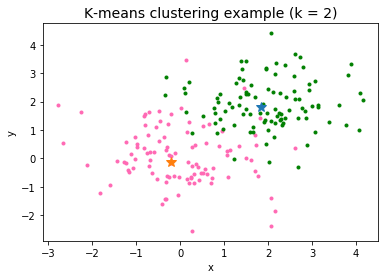

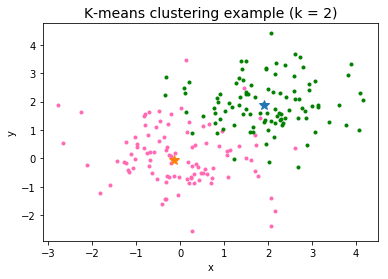

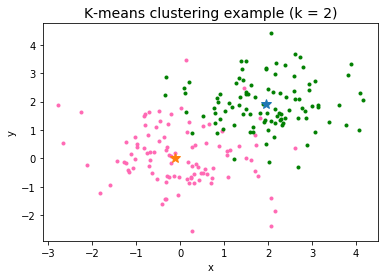

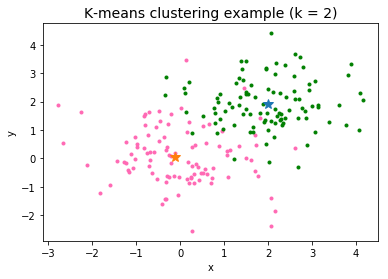

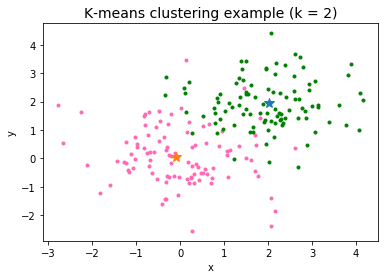

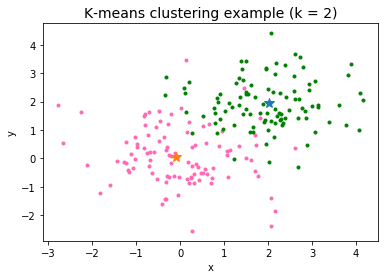

In [13]:
oldc = initcenters.copy()
i = 0

while np.array_equal(newc,oldc) == False:
    
    # Create new clusters
    cl1 = distmetric(random_1[0], random_1[1], newc[0]) < distmetric(random_1[0], random_1[1], newc[1])
    cl2 = distmetric(random_2[0], random_2[1], newc[0]) < distmetric(random_2[0], random_2[1], newc[1])
    
    # Set temporary variable for previous new centers
    temp = newc
    
    # Define new centers
    newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
    # Print Iteration Number
    print('iteration ', i)
    
    # Set up plots
    fig, ax = plt.subplots()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.title('K-means clustering example (k = 2)', 
          fontsize = 14);
    
    # Plot Scatters and Centers
    ax.plot(random_1[0], random_1[1], '.', c = 'HotPink')
    ax.plot(random_2[0], random_2[1], '.', c = 'green')
    ax.plot(newc[0,0], newc[0,1], '*', ms=10)
    ax.plot(newc[1,0], newc[1,1], '*', ms=10)
    
    # For Animation to display
    time.sleep(1) # too slow it down
    clear_output(wait=True)
    display(fig)
    
    # Define old center as the previous new center
    oldc = temp
    
    # Print Variables
    print ("old center\n", oldc, "\nnew center\n", newc,"\n")
    
    # Limit number of iterations to 10 so does not iterate indefinitely
    i += 1
    if i > 10:
        break

## THANK YOU!

## ASH Score 100